<a href="https://colab.research.google.com/github/muajnstu/Fake-News-Detection-using-Deep-Learning-LSTM-Approach/blob/main/fake_news_classification_using_gensim_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> Fake vs True News Classification Using inbuilt gensim Word2Vec Embeddings: </b>

* In the last few years, due to the widespread usage of online social networks, fake news spreading at an alarming rate for various commercial and political purposes which is a matter of concern as it has numerous psychological effects on offline society

*  Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

<b> "By 2022, most people in mature economies will consume more false information than true information." </b>

* We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

* We will use Word2Vec from gensim which is trained on massive wikipedia & dataset to pre-process and text vectorization and apply different classification algorithms.

**Dataset**

* The data used in this case study is the **ISOT Fake News Dataset**. The dataset contains two types of articles fake and real news.
* The dataset consists of two CSV files. The first file named True.csv contains more than 12,600 articles from Reuters.com. The second file named Fake.csv contains more than 12,600 articles from different fake news outlet resources

# Import modules & libraries

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import pandas as pd
import numpy as np

#Import dataset

In [ ]:
df_fake=pd.read_csv('https://raw.githubusercontent.com/muajnstu/Fake-News-Detection-using-Deep-Learning-LSTM-Approach/main/Fake.csv')


In [ ]:
df_fake=df_fake.drop(['subject','date'], axis=1)

df_fake['label']='Fake'

In [ ]:
df_true = pd.read_csv('https://raw.githubusercontent.com/muajnstu/Fake-News-Detection-using-Deep-Learning-LSTM-Approach/main/True.csv')
df_true=df_true.drop(['subject','date'],axis=1)
df_true['label']='TRUE'

df= pd.concat([df_true, df_fake], ignore_index=True)

In [ ]:
#shuffling the dataset & create final dataset
df=df.reindex(np.random.permutation(df.index))
df

,title,text,label
18328,Mohammed Dahlan speaks about Palestinian unity...,"GAZA (Reuters) - Mohammad Dahlan, who played a...",TRUE
23122,Delusional Trump Hilariously Thinks Angela Me...,We all remember the absolutely disastrous visi...,Fake
32913,MADNESS IN BERKELEY: Anarchists Clash With Tru...,THE ANTIFA ANARCHISTS ARE IN ALL BLACK:WOMAN I...,Fake
20362,"With 7.4 million without power, utility worker...",Fort Lauderdale and New York (Reuters) - When ...,TRUE
38241,SUPREME COURT AGREES TO TAKE ON Obama’s Un-Ame...,"So far, the Supreme Court has not prevented on...",Fake
...,...,...,...
16579,Demoralized and divided: inside Catalonia's po...,BARCELONA (Reuters) - With the Spanish governm...,TRUE
30828,UNHINGED TEXAS WOMAN DRIVING Pickup Truck With...,Just another case of Love Trumps Hate LOL! Th...,Fake
13275,Embattled Australian PM says he will lead gove...,MELBOURNE (Reuters) - Australia s embattled co...,TRUE
37334,THE ONE PARAGRAPH You Need To Read From The JF...,President Trump announced the release of the r...,Fake


# Preprocessing & Word embeddings using spacy & gensim libraries

In [ ]:
import re
# function for extracting desired text using regex
def extract_txt(text):
    regex = re.search(r"(?<=\(Reuters\)\s\-\s).*",text)
    if regex:
        return regex.group(0)
    return text
#applying regex function to retain only relevant text
df['text_processed'] = df['text'].apply(extract_txt)

#checking dataframe containing only True News
df[df.label=="TRUE"]

,title,text,label,text_processed
18328,Mohammed Dahlan speaks about Palestinian unity...,"GAZA (Reuters) - Mohammad Dahlan, who played a...",TRUE,"Mohammad Dahlan, who played a key backroom rol..."
20362,"With 7.4 million without power, utility worker...",Fort Lauderdale and New York (Reuters) - When ...,TRUE,When more than 7.4 million homes and businesse...
8438,New Trump campaign manager to push candidate t...,WASHINGTON (Reuters) - Donald Trump’s new camp...,TRUE,Donald Trump’s new campaign manager said on We...
2459,Lawmakers say Ross defers to Trump on U.S. ste...,WASHINGTON (Reuters) - U.S. lawmakers said on ...,TRUE,U.S. lawmakers said on Thursday that Commerce ...
15114,Saudi-led coalition opens Yemen border crossin...,ADEN/GENEVA (Reuters) - The Saudi-led military...,TRUE,The Saudi-led military coalition fighting agai...
...,...,...,...,...
15008,Four dead after earthquake in Iraq's Kurdistan...,"ERBIL, Iraq (Reuters) - At least four people d...",TRUE,At least four people died and dozens were woun...
21399,Saudi police release teenager detained for dan...,DUBAI (Reuters) - A 14-year-old boy who was de...,TRUE,A 14-year-old boy who was detained by Saudi po...
16579,Demoralized and divided: inside Catalonia's po...,BARCELONA (Reuters) - With the Spanish governm...,TRUE,With the Spanish government ready to take over...
13275,Embattled Australian PM says he will lead gove...,MELBOURNE (Reuters) - Australia s embattled co...,TRUE,Australia s embattled conservative Prime Minis...


In [ ]:
# drop extra column
df = df.drop(['text'],axis=1)
df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
df

,title,label,text_processed
18328,Mohammed Dahlan speaks about Palestinian unity...,0,"Mohammad Dahlan, who played a key backroom rol..."
23122,Delusional Trump Hilariously Thinks Angela Me...,1,We all remember the absolutely disastrous visi...
32913,MADNESS IN BERKELEY: Anarchists Clash With Tru...,1,THE ANTIFA ANARCHISTS ARE IN ALL BLACK:WOMAN I...
20362,"With 7.4 million without power, utility worker...",0,When more than 7.4 million homes and businesse...
38241,SUPREME COURT AGREES TO TAKE ON Obama’s Un-Ame...,1,"So far, the Supreme Court has not prevented on..."
...,...,...,...
16579,Demoralized and divided: inside Catalonia's po...,0,With the Spanish government ready to take over...
30828,UNHINGED TEXAS WOMAN DRIVING Pickup Truck With...,1,Just another case of Love Trumps Hate LOL! Th...
13275,Embattled Australian PM says he will lead gove...,0,Australia s embattled conservative Prime Minis...
37334,THE ONE PARAGRAPH You Need To Read From The JF...,1,President Trump announced the release of the r...


In [ ]:
#combining text_processed and title for creating full news article with headline
df['final_news'] = df['title'] + " " + df['text_processed']

# now we can delete extra columns
cols_del =['title','text_processed']
df = df.drop(cols_del,axis=1)

df.head(500)

,label,final_news
18328,0,Mohammed Dahlan speaks about Palestinian unity...
23122,1,Delusional Trump Hilariously Thinks Angela Me...
32913,1,MADNESS IN BERKELEY: Anarchists Clash With Tru...
20362,0,"With 7.4 million without power, utility worker..."
38241,1,SUPREME COURT AGREES TO TAKE ON Obama’s Un-Ame...
...,...,...
41356,1,THE SMARTEST WOMAN In Politics: “How Trump Can...
33981,1,BREAKING BOMBSHELL: WEINER IS COOPERATING…FBI ...
22375,1,Texas Supreme Court Just Proved They Do Not S...
1674,0,Senate Republican tax chief wants dividend ded...


In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [ ]:


def preprocess_and_vectorize(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return wv.get_mean_vector(filtered_tokens)

In [ ]:
v = preprocess_and_vectorize("Don't worry if you don't understand")
v.shape

(300,)

In [ ]:
#this query takes few minutes, so go get some walk :)

df['vector'] = df['final_news'].apply(lambda text: preprocess_and_vectorize(text))

In [ ]:
df.head()

,label,final_news,vector
18328,0,Mohammed Dahlan speaks about Palestinian unity...,"[0.012988527, 0.0131631335, -0.003317143, 0.01..."
23122,1,Delusional Trump Hilariously Thinks Angela Me...,"[0.0121237375, 0.019178992, -0.0026212397, 0.0..."
32913,1,MADNESS IN BERKELEY: Anarchists Clash With Tru...,"[0.01958427, 0.007332599, 0.018822473, 0.03452..."
20362,0,"With 7.4 million without power, utility worker...","[0.0023828729, 0.009493461, 0.0029156592, 0.00..."
38241,1,SUPREME COURT AGREES TO TAKE ON Obama’s Un-Ame...,"[0.004212157, 0.017833259, 0.014113652, 0.0273..."


# Modeling & prediction

In [ ]:
from sklearn.model_selection import train_test_split


#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label
)

In [ ]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (35918,)
Shape of X_test before reshaping:  (8980,)
Shape of X_train after reshaping:  (35918, 300)
Shape of X_test after reshaping:  (8980, 300)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4284
           1       0.97      0.96      0.96      4696

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [ ]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4284
           1       0.97      0.94      0.96      4696

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



# Confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

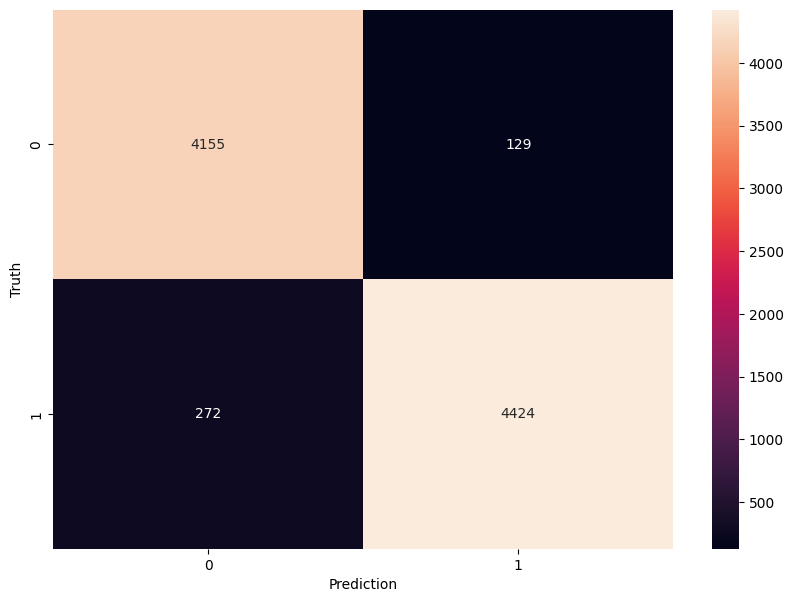

In [ ]:
#finally print the confusion matrix for the best model (GradientBoostingClassifier)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')